In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Airline_Delay_Cause.csv")
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [4]:
data.isna().sum()

year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64

In [5]:
data.dropna(inplace = True)

In [6]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [7]:
data.drop(columns = ["carrier","carrier_name","airport","airport_name"], inplace = True)
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [8]:
data.columns

Index(['year', 'month', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
       'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [9]:
data['weather_delay'].min(), data['weather_delay'].max()

(0.0, 57707.0)

In [10]:
data["WCase"] = data["weather_delay"].apply(lambda x : 1 if x > 100 else 0)

In [11]:
data["WCase"].value_counts()

WCase
0    215111
1    102150
Name: count, dtype: int64

In [12]:
X = data.drop(["WCase"] , axis = 1)
y = data["WCase"]

In [13]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [14]:
y

0         0
1         0
2         0
3         0
4         0
         ..
318012    1
318013    1
318014    0
318015    0
318016    1
Name: WCase, Length: 317261, dtype: int64

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=44 , shuffle= True)

In [16]:
print("X_train_shape : " , X_train.shape)
print("X_test_shape : " , X_test.shape)
print("y_train_shape : " , y_train.shape)
print("y_test_shape : " , y_test.shape)

X_train_shape :  (237945, 17)
X_test_shape :  (79316, 17)
y_train_shape :  (237945,)
y_test_shape :  (79316,)


In [17]:
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import AdamW

In [18]:
KerasModel = keras.models.Sequential([
    
               #keras.layers.Input(shape=(17)),
               keras.layers.Dense(8, activation= "tanh"),
               # keras.layers.Dropout(0.1),
               keras.layers.Dense(128, activation = 'sigmoid'),
               # keras.layers.Dropout(0.1),
               keras.layers.Dense(64, activation = 'tanh'),
               keras.layers.Dense(32, activation = 'tanh'),
               keras.layers.Dropout(0.2),
               keras.layers.Dense(1,activation = 'sigmoid')
])

In [19]:
MyOptimizer = AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="AdamW"
)

In [20]:
KerasModel.compile(optimizer =MyOptimizer , loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = KerasModel.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7008 - loss: 0.5853 - val_accuracy: 0.7745 - val_loss: 0.4928
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7762 - loss: 0.4890 - val_accuracy: 0.7872 - val_loss: 0.4717
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7943 - loss: 0.4699 - val_accuracy: 0.8032 - val_loss: 0.4589
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8048 - loss: 0.4565 - val_accuracy: 0.8072 - val_loss: 0.4464
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8093 - loss: 0.4442 - val_accuracy: 0.8170 - val_loss: 0.4326
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8186 - loss: 0.4307 - val_accuracy: 0.8255 - val_loss: 0.4156
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8299 - loss: 0.4118 - val_accuracy: 0.8379 - val_loss: 0.3964
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8397 - loss: 0.3925 - val_accuracy: 0.

In [22]:
print(KerasModel.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,997 (136.71 KB)

 Trainable params: 11,665 (45.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,332 (91.14 KB)

None


In [23]:
KerasModel.save('KerasModel.keras') 

In [24]:
NewKerasModel = keras.models.load_model('KerasModel.keras')


In [25]:
X_test

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
281030,2005,9,209.0,34.0,10.12,0.19,8.88,0.0,14.80,1.0,0.0,2045.0,469.0,41.0,541.0,0.0,994.0
6930,2022,1,617.0,82.0,29.69,2.04,26.88,0.3,23.08,27.0,1.0,5410.0,2471.0,157.0,1095.0,15.0,1672.0
68406,2018,12,733.0,169.0,58.64,4.61,67.43,0.0,38.32,17.0,0.0,9497.0,3524.0,818.0,2633.0,0.0,2522.0
113309,2015,10,194.0,36.0,6.82,4.03,9.22,0.0,15.92,0.0,0.0,1575.0,249.0,91.0,317.0,0.0,918.0
239094,2007,12,90.0,24.0,9.79,2.56,1.75,0.0,9.90,2.0,0.0,1396.0,459.0,301.0,77.0,0.0,559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32889,2020,10,356.0,23.0,8.12,0.00,10.33,0.0,4.56,0.0,2.0,989.0,516.0,0.0,260.0,0.0,213.0
153169,2013,1,120.0,23.0,11.37,1.06,5.60,0.0,4.96,4.0,0.0,998.0,550.0,62.0,161.0,0.0,225.0
262871,2006,9,94.0,28.0,10.00,0.00,0.00,0.0,18.00,4.0,0.0,1501.0,506.0,0.0,0.0,0.0,995.0
221469,2008,11,74.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
y_pred = NewKerasModel.predict(X_test)

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


In [27]:
print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (79316, 1)


In [28]:
print('Prediction items are {}'.format(y_pred[:5]))


Prediction items are [[6.5637630e-04]
 [9.9140620e-01]
 [9.9949396e-01]
 [6.5638224e-04]
 [9.9963731e-01]]


In [29]:
y_test[:5]

281030    0
6930      1
68406     1
113309    0
239094    1
Name: WCase, dtype: int64

In [30]:

ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))


2479/2479 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9990 - loss: 0.0048
Model Loss is 0.005715566221624613
Model Accuracy is 0.9986635446548462


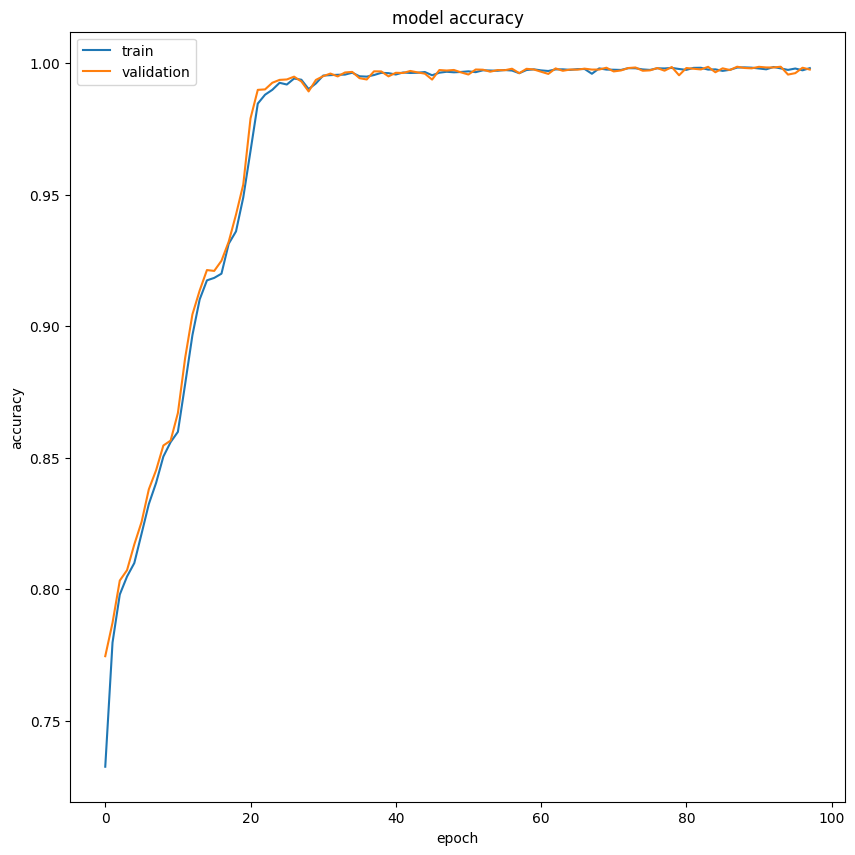

In [31]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


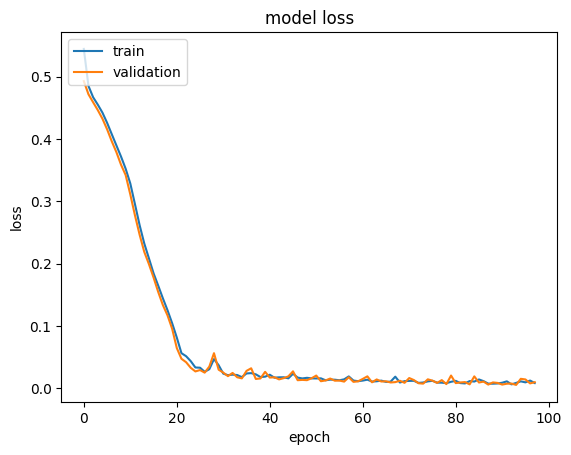

In [32]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [33]:
len(y_test), len(y_pred)

(79316, 79316)

In [34]:
y_pred

array([[6.5637630e-04],
       [9.9140620e-01],
       [9.9949396e-01],
       ...,
       [6.5637630e-04],
       [2.4766344e-04],
       [9.9951464e-01]], dtype=float32)

In [35]:
y_pred = [np.round(i[0]) for i in y_pred]
y_pred

[0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[53637    64]
 [   42 25573]]


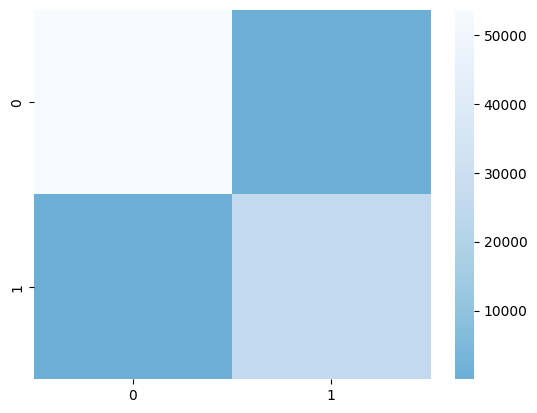

In [37]:

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()


In [38]:

from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )


Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53701
           1       1.00      1.00      1.00     25615

    accuracy                           1.00     79316
   macro avg       1.00      1.00      1.00     79316
weighted avg       1.00      1.00      1.00     79316

